PREPROSES

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data.csv')
data

,data_clean,label
0,jalan jatibarupolisi gertak gubernur emangny p...,anger
1,cewek kayak rasa sibuk jaga rasa sakit haid pa...,anger
2,gudeg mbarek bu hj foto google sengaja biar te...,happy
3,jalan jatibarubagian wilayah tn abangpengatura...,anger
4,sharing alam kemarin jam batalin tiket stasiun...,happy
...,...,...
4396,tahu papa mejam mata tahan gejolak batin papa ...,love
4397,sulit tetap calon wakil presiden jokowi pilih ...,fear
4398,depan tidak iya coba lulus seni bisa tari kerj...,anger
4399,nama guna benar ada mahasiswa teknik oi tembak...,happy


In [ ]:
# Cek missing value
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 label    0
tweet    0
dtype: int64


In [ ]:
# Cek data duplikat
duplicate_rows = data[data.duplicated()]
print("\nDuplicate rows:\n", duplicate_rows)


Duplicate rows:
         label                                              tweet
1052     fear  [USERNAME] [USERNAME] Tidak disemua tempat kit...
1358    anger  belajar agama yg tuntas jd nga ngarang dalam h...
1464     fear  Aku gak salah bila mohon pd [USERNAME], segera...
1531  sadness  Turut sepenanggungan atas meninggalnya dr. Ram...
2512     love  Walaupun kita jauh secara fisik, kita tahu kit...
2908    happy  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
3319    happy  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
3523    happy  All We Know of Heaven, All We Need of Hell - P...
3559    happy  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
3735    happy  Bismillah Salam PLUR slankers/i indonesia kita...
3781     fear  Melihat Fotonya Saja Bikin Ngeri, Apalagi Meng...


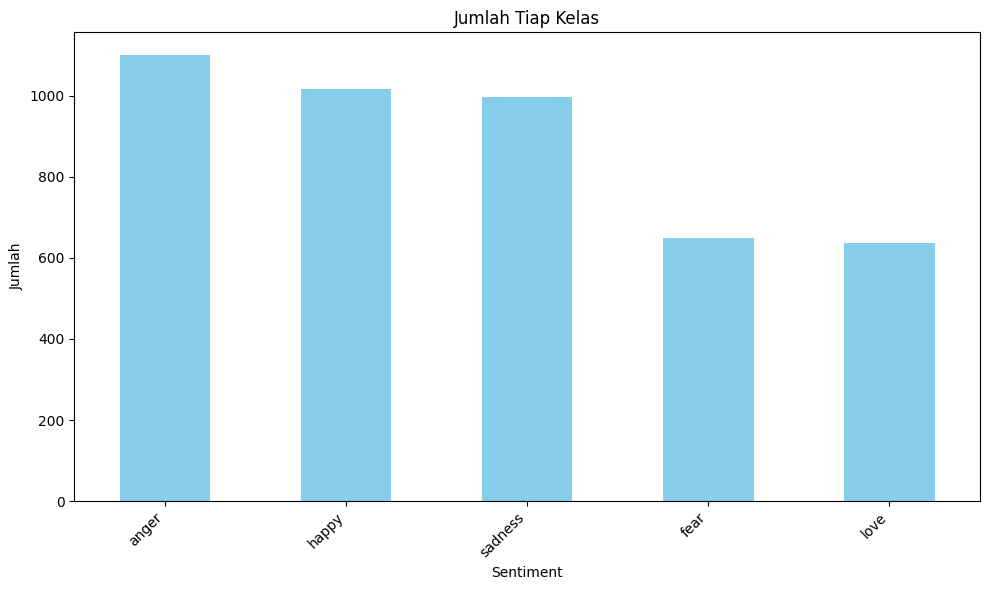

In [ ]:
fertilizer_counts = data['label'].value_counts()

plt.figure(figsize=(10, 6))
fertilizer_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Tiap Kelas')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
id_stopword_dict = pd.read_csv('/content/gdrive/MyDrive/PKMF 2024/stopwordbahasa.csv', encoding='latin-1')
id_stopword_dict1 = id_stopword_dict.rename(columns={0: 'stop'})
id_stopword_dict1.head()

,ada
0,adalah
1,adanya
2,adapun
3,agak
4,agaknya


In [ ]:
alay_dict = pd.read_csv('/content/gdrive/MyDrive/PKMF 2024/new_kamusalay.csv', header=None, encoding='latin-1')
alay_dict = alay_dict.rename(columns={0: 'original',
                                     1: 'replacement'})
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
alay_dict.head()

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
# Read the CSV file and specify the separator as ';'
kamus_singkatan_deluxe = pd.read_csv('/content/gdrive/MyDrive/PKMF 2024/kamus_singkatan_deluxe.csv', sep=';', encoding='latin-1')
# Set the column names
kamus_singkatan_deluxe.columns = ['Column1', 'Column2']
# Rename the columns correctly
alay_dict2 = kamus_singkatan_deluxe.rename(columns={'Column1': 'original', 'Column2': 'replacement'})
# Create a dictionary for mapping
alay_dict_map2 = dict(zip(alay_dict2['original'], alay_dict2['replacement']))
# Display the head of the renamed DataFrame
alay_dict2.head()

,original,replacement
0,adek,adik
1,adlh,adalah
2,aer,air
3,aiskrim,es krim
4,aj,saja


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
#merubah semua tipe data pada kolom ulasan menjadi string
data['tweet']= data['tweet'].astype(str)
#melakukan case folding berupa mengganti huruf besar menjadi kecil
data['tweet']= data['tweet'].str.lower()

In [ ]:
import string
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus email
    text = re.sub(r'\S+@\S+', '', text)

    # Menghapus tanggal (format yyyy-mm-dd)
    text = re.sub(r'\d{4}-\d{2}-\d{2}', '', text)

    # Menghapus URL
    text = re.sub(r'http\S+', '', text)

    # Menghapus HTML tag
    text = re.sub(r'<.*?>', '', text)

    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Menghapus tanda baca (punctuation)
    text = re.sub(r'\d', ' ', text)  # Mengganti angka dengan spasi

    # Menghapus emoji (emoticon)
    text = remove_emoji(text)

    # Menghapus karakter-karakter non-alphanumerik seperti *[ { [*
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Mengganti beberapa spasi ganda dengan satu spasi
    text = re.sub(r'\s+', ' ', text)

    #menghapus singgle chart
    text = re.sub(r'\b\w\b', '', text)

    return text

# Fungsi untuk menghapus emoji dari teks
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Contoh penggunaan pada kolom 'ulasan' pada dataframe
data['tweet'] = data['tweet'].apply(clean_text)

In [ ]:
data

,label,tweet
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...
3,anger,jln jatibarubagian dari wilayah tn abangpengat...
4,happy,sharing pengalaman aja kemarin jam batalin tik...
...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...
4398,anger,masa depannya nggak jelas lha iya gimana mau ...
4399,happy,username dulu beneran ada mahasiswa teknik ui ...


In [ ]:
from nltk.tokenize import word_tokenize

# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['data_tokenize']=data['tweet'].apply(word_tokenize_wrapper)
data

,label,tweet,data_tokenize
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g..."
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ..."
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang..."
4,happy,sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal..."
...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja..."
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow..."
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,"[masa, depannya, nggak, jelas, lha, iya, giman..."
4399,happy,username dulu beneran ada mahasiswa teknik ui ...,"[username, dulu, beneran, ada, mahasiswa, tekn..."


In [ ]:
def normalize_alay(tokens):
    return [alay_dict_map[token] if token in alay_dict_map else token for token in tokens]

def normalize_alay2(tokens):
    return [alay_dict_map2[token] if token in alay_dict_map2 else token for token in tokens]

def norm(tokens):
    tokens = normalize_alay(tokens)  # Normalize tokens using alay_dict_map
    tokens = normalize_alay2(tokens)  # Normalize tokens using alay_dict_map2
    return tokens

data['data_normalisasi'] = data['data_tokenize'].apply(norm)

In [ ]:
data

,label,tweet,data_tokenize,data_normalisasi
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[soal, jalan, jatibarupolisi, tidak, bisa, ger..."
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewek, kamu, kayaknya, harusnya, bisa..."
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[ingin, gudeg, mbarek, bu, hj, amat, foto, dar..."
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jalan, jatibarubagian, dari, wilayah, tn, aba..."
4,happy,sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, saja, kemarin, jam, bata..."
...,...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja...","[tahukah, kamu, bahwa, saat, itu, papa, memeja..."
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow...","[sulitnya, menetapkan, calon, wakil presidenny..."
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,"[masa, depannya, nggak, jelas, lha, iya, giman...","[masa, depannya, tidak , jelas, lah, iya, baga..."
4399,happy,username dulu beneran ada mahasiswa teknik ui ...,"[username, dulu, beneran, ada, mahasiswa, tekn...","[nama pengguna, dulu, benaran, ada, mahasiswa,..."


In [ ]:
def remove_stopword(tokens):
    filtered_tokens = [token for token in tokens if token not in id_stopword_dict.ada.values]
    text = ' '.join(filtered_tokens)
    text = re.sub('  +', ' ', text)  # Remove extra spaces
    text = text.strip()
    return text

data['data_stopword'] = data['data_normalisasi'].apply(remove_stopword)

In [ ]:
data

,label,tweet,data_tokenize,data_normalisasi,data_stopword
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[soal, jalan, jatibarupolisi, tidak, bisa, ger...",jalan jatibarupolisi gertak gubernur emangny p...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewek, kamu, kayaknya, harusnya, bisa...",cewek kayaknya rasakan sibuk jaga rasakan saki...
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[ingin, gudeg, mbarek, bu, hj, amat, foto, dar...",gudeg mbarek bu hj foto google sengaja biar te...
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jalan, jatibarubagian, dari, wilayah, tn, aba...",jalan jatibarubagian wilayah tn abangpengatura...
4,happy,sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, saja, kemarin, jam, bata...",sharing pengalaman kemarin jam batalin tiket s...
...,...,...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja...","[tahukah, kamu, bahwa, saat, itu, papa, memeja...",tahukah papa memejamkan matanya menahan gejola...
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow...","[sulitnya, menetapkan, calon, wakil presidenny...",sulitnya menetapkan calon wakil presidennya jo...
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,"[masa, depannya, nggak, jelas, lha, iya, giman...","[masa, depannya, tidak , jelas, lah, iya, baga...",depannya tidak iya coba lulusan seni bisanya m...
4399,happy,username dulu beneran ada mahasiswa teknik ui ...,"[username, dulu, beneran, ada, mahasiswa, tekn...","[nama pengguna, dulu, benaran, ada, mahasiswa,...",nama pengguna benaran ada mahasiswa teknik oi ...


In [ ]:
pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return stemmer.stem(text)
data['data_stemming'] = data['data_stopword'].apply(stem_text)

In [ ]:
data

,label,tweet,data_tokenize,data_normalisasi,data_stopword,data_stemming
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,"[soal, jln, jatibarupolisi, tdk, bs, gertak, g...","[soal, jalan, jatibarupolisi, tidak, bisa, ger...",jalan jatibarupolisi gertak gubernur emangny p...,jalan jatibarupolisi gertak gubernur emangny p...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewek, kamu, kayaknya, harusnya, bisa...",cewek kayaknya rasakan sibuk jaga rasakan saki...,cewek kayak rasa sibuk jaga rasa sakit haid pa...
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[ingin, gudeg, mbarek, bu, hj, amat, foto, dar...",gudeg mbarek bu hj foto google sengaja biar te...,gudeg mbarek bu hj foto google sengaja biar te...
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,"[jln, jatibarubagian, dari, wilayah, tn, abang...","[jalan, jatibarubagian, dari, wilayah, tn, aba...",jalan jatibarubagian wilayah tn abangpengatura...,jalan jatibarubagian wilayah tn abangpengatura...
4,happy,sharing pengalaman aja kemarin jam batalin tik...,"[sharing, pengalaman, aja, kemarin, jam, batal...","[sharing, pengalaman, saja, kemarin, jam, bata...",sharing pengalaman kemarin jam batalin tiket s...,sharing alam kemarin jam batalin tiket stasiun...
...,...,...,...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja...","[tahukah, kamu, bahwa, saat, itu, papa, memeja...",tahukah papa memejamkan matanya menahan gejola...,tahu papa mejam mata tahan gejolak batin papa ...
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow...","[sulitnya, menetapkan, calon, wakil presidenny...",sulitnya menetapkan calon wakil presidennya jo...,sulit tetap calon wakil presiden jokowi pilih ...
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,"[masa, depannya, nggak, jelas, lha, iya, giman...","[masa, depannya, tidak , jelas, lah, iya, baga...",depannya tidak iya coba lulusan seni bisanya m...,depan tidak iya coba lulus seni bisa tari kerj...
4399,happy,username dulu beneran ada mahasiswa teknik ui ...,"[username, dulu, beneran, ada, mahasiswa, tekn...","[nama pengguna, dulu, benaran, ada, mahasiswa,...",nama pengguna benaran ada mahasiswa teknik oi ...,nama guna benar ada mahasiswa teknik oi tembak...


In [ ]:
# Drop semua kolom kecuali 'data_stemming'
data_clean = data[['data_stemming','label']].copy()

# Ubah nama kolom menjadi 'data_clean'
data_clean.columns = ['data_clean','label']

In [ ]:
data_clean = pd.read_csv('data.csv')


In [ ]:
data_clean

,data_clean,label
0,jalan jatibarupolisi gertak gubernur emangny p...,anger
1,cewek kayak rasa sibuk jaga rasa sakit haid pa...,anger
2,gudeg mbarek bu hj foto google sengaja biar te...,happy
3,jalan jatibarubagian wilayah tn abangpengatura...,anger
4,sharing alam kemarin jam batalin tiket stasiun...,happy
...,...,...
4396,tahu papa mejam mata tahan gejolak batin papa ...,love
4397,sulit tetap calon wakil presiden jokowi pilih ...,fear
4398,depan tidak iya coba lulus seni bisa tari kerj...,anger
4399,nama guna benar ada mahasiswa teknik oi tembak...,happy


**EKSTRAKSI FITUR (FASTEXT)**

In [ ]:
pip install gensim

In [ ]:
import gensim
import numpy as np
from gensim.models.fasttext import load_facebook_model

fasttext = gensim.models.fasttext.load_facebook_model("/content/gdrive/MyDrive/PKMF 2024/Fastext_model_tweet.bin")
print("Ada %s vektor kata yang ditemukan dalam model FastText" % len(fasttext.wv))
"""_Merepresentasikan setiap tweet ke dalam vektor bilangan real_"""
vectors = []
for text in data_clean.data_clean.values:
    word_embedding = []
    for word in text.split(" "):
        try:
            word_vec = fasttext.wv[word]
            word_embedding.append(word_vec)
        except:
            pass
    word_embedding = np.array(word_embedding)
    embeddings = np.mean(word_embedding, axis=0)
    vectors.append(embeddings)
vectors = np.array(vectors)
print("Dimensi dari fitur yang digunakan yaitu", (vectors.shape))

ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe2'; replacing invalid characters, using '\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe5'; replacing invalid characters, using '\\xe5'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe3'; replacing invalid characters, using '\\xe3'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xeb'; replacing invalid characters, using '\\xeb'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x9c\xe2'; replacing invalid characters, using 'x9c\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xf4'; replacing invalid characters, using '\\xf4'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x98\xe2'; replacing invalid characters, using 'x98\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x99\xe2'; replacing invalid cha

Ada 69465 vektor kata yang ditemukan dalam model FastText
Dimensi dari fitur yang digunakan yaitu (4401, 100)


In [ ]:
len(vectors[0])

100

In [ ]:
len(data['data_clean'][0])

177

In [ ]:
vectors

array([[ 0.0556067 , -0.0136111 , -0.11228901, ..., -0.05554997,
         0.19780457, -0.01986074],
       [-0.01004727,  0.0606657 , -0.19898313, ...,  0.05387817,
         0.1413622 , -0.07690879],
       [ 0.10354462, -0.34276602,  0.02499403, ..., -0.05520574,
         0.23831575, -0.2435426 ],
       ...,
       [ 0.07835765, -0.01573027, -0.22351529, ..., -0.1381704 ,
         0.17882267, -0.10001951],
       [ 0.17744431, -0.06967652, -0.06352296, ..., -0.03733947,
         0.20335317, -0.2606407 ],
       [ 0.07084759,  0.11049691, -0.25478822, ..., -0.04400197,
         0.21114627, -0.11562229]], dtype=float32)

**PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=80)
X_PCA = pca.fit_transform(vectors)

In [ ]:
X_PCA

**TRAINING MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_PCA, data_clean['label'], test_size=0.10, random_state=42)

In [ ]:
rbf_feature = Nystroem(kernel='rbf', gamma=0.2, random_state=42, n_components=300)
linear_svc = SVC(kernel='linear', random_state=42)

combined_features = FeatureUnion([("rbf", rbf_feature), ("linear", "passthrough")])


In [ ]:
pipeline = make_pipeline(StandardScaler(), combined_features, linear_svc)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('featureunion',
                 FeatureUnion(transformer_list=[('rbf',
                                                 Nystroem(gamma=0.2,
                                                          n_components=300,
                                                          random_state=42)),
                                                ('linear',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('svc', SVC(kernel='linear', random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9841269841269841
Laporan Klasifikasi:
               precision    recall  f1-score   support

       anger       0.98      0.98      0.98       119
        fear       0.98      1.00      0.99        62
       happy       0.97      0.98      0.98       111
        love       1.00      0.98      0.99        55
     sadness       0.99      0.98      0.98        94

    accuracy                           0.98       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.98      0.98      0.98       441



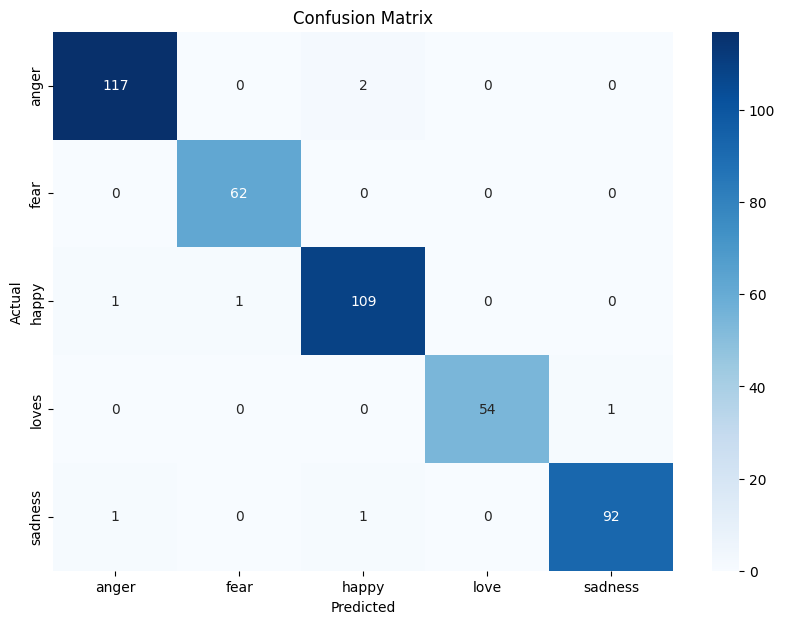

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=["anger", "fear","happy","love","sadness"])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["anger","fear","happy","love","sadness"], yticklabels=["anger", "fear","happy","loves","sadness"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


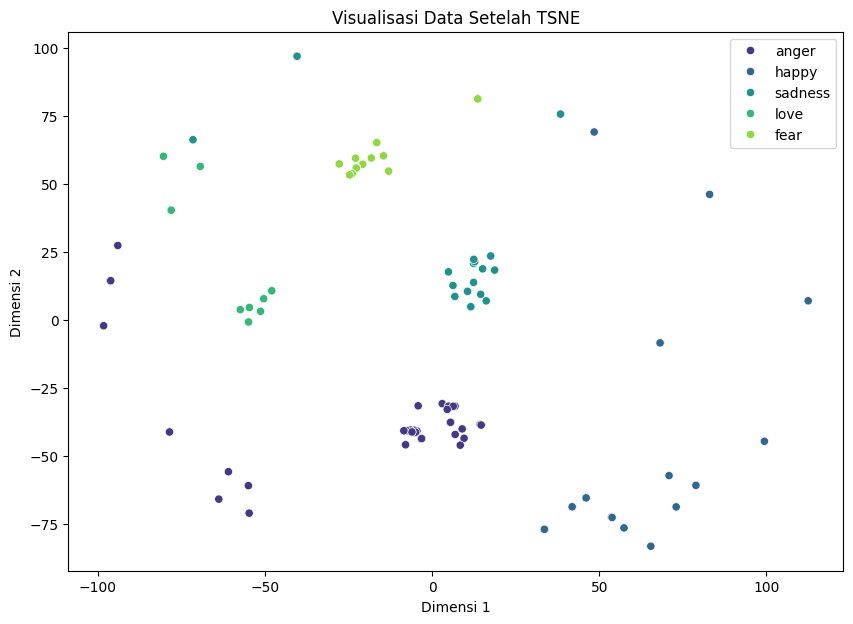

In [ ]:
from sklearn.manifold import TSNE

# Reduksi dimensi lebih lanjut untuk visualisasi scatter plot
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_PCA)

# Visualisasi scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data_clean['label'], palette="viridis")
plt.title('Visualisasi Data Setelah TSNE')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.legend(loc='best')
plt.show()

SAVE MODEL

In [ ]:
import joblib
# Menyimpan model yang telah dilatih
model_filename = 'svm_emosi.pkl'
joblib.dump(pipeline, model_filename)
print(f"Model telah disimpan sebagai {model_filename}")

Model telah disimpan sebagai svm_emosi.pkl


_____________________________________________________________
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
_____________________________________________________________

OUTPUT LABELING (PADA DATA HASIL CRAWL)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pret = pd.read_csv('dodogemas.csv')

In [ ]:
pret

,full_text,jenis,data_clean
0,@raenzaraenzaa @itsurboihyl Di sini ortunya ba...,kip,orang tua pelit keluar duit didik anak ada pur...
1,@Red_Alien_ Setuju. Oke lah dia termasuk miski...,kip,tuju oke miskin pas terima kip cari hasil naik...
2,orang salty tapi gamau disaltyin,kip,orang salty tidak mau disaltyin
3,nih baca ya para netizen paling suci akun kip ...,kip,nih baca ya warganet suci akun kip officialnya...
4,tau gaaa guyss kemrin habis ngobrol sama anak ...,kip,gaaa guyss kemrin habis obrol anak kip ngbroli...
...,...,...,...
2986,KIKP itu Kartu Indonesia Kuliah Pintar ya geng...,kipk,kikp kartu indonesia kuliah pintar ya gengs ra...
2987,Seiring dengan tujuan untuk mendukung akses pe...,kipk,iring tuju dukung akses didik mahasiswa keluar...
2988,Kontroversi memanas seputar selebgram yang mew...,kipk,kontroversi panas putar selebriti instagram me...
2989,@sbmptnfess Hadahh kenapa namanya kartu Indone...,kipk,hadahh nama kartu indonesia pintar ya biar hal...


In [ ]:
import numpy as np
import gensim
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#merubah semua tipe data pada kolom ulasan menjadi string
pret['data_clean']= pret['data_clean'].astype(str)

In [ ]:
from gensim.models.fasttext import load_facebook_model
fasttext = gensim.models.fasttext.load_facebook_model("/content/gdrive/MyDrive/PKMF 2024/Fastext_model_tweet.bin")
print("Ada %s vektor kata yang ditemukan dalam model FastText" % len(fasttext.wv))
"""_Merepresentasikan setiap tweet ke dalam vektor bilangan real_"""
vectors = []
for text in pret.data_clean.values:
    word_embedding = []
    for word in text.split(" "):
        try:
            word_vec = fasttext.wv[word]
            word_embedding.append(word_vec)
        except:
            pass
    word_embedding = np.array(word_embedding)
    embeddings = np.mean(word_embedding, axis=0)
    vectors.append(embeddings)
vectors = np.array(vectors)
print("Dimensi dari fitur yang digunakan yaitu", (vectors.shape))

ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe2'; replacing invalid characters, using '\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe5'; replacing invalid characters, using '\\xe5'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe3'; replacing invalid characters, using '\\xe3'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xeb'; replacing invalid characters, using '\\xeb'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x9c\xe2'; replacing invalid characters, using 'x9c\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xf4'; replacing invalid characters, using '\\xf4'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x98\xe2'; replacing invalid characters, using 'x98\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x99\xe2'; replacing invalid cha

Ada 69465 vektor kata yang ditemukan dalam model FastText
Dimensi dari fitur yang digunakan yaitu (2991, 100)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=80)
X_PCA = pca.fit_transform(vectors)

In [ ]:
from time import time
import joblib

start = time()
loaded_model = joblib.load("svm_emosi.pkl")
Y_pred = loaded_model.predict(X_PCA)
# acc_score = accuracy_score(Y_test, Y_pred)
end = time()
elapsed = end - start

print(Y_pred)
print("Lama waktu yang dibutuhkan untuk memproses yaitu %.2f detik." % (elapsed))

['anger' 'love' 'anger' ... 'sadness' 'fear' 'sadness']
Lama waktu yang dibutuhkan untuk memproses yaitu 0.14 detik.


In [ ]:
pret['predicted_sentiment'] = Y_pred

print("Prediksi sentimen telah ditambahkan ke dalam DataFrame 'pret':")
print(pret[['data_clean', 'predicted_sentiment']].head())

Prediksi sentimen telah ditambahkan ke dalam DataFrame 'pret':
                                          data_clean predicted_sentiment
0  orang tua pelit keluar duit didik anak ada pur...               anger
1  tuju oke miskin pas terima kip cari hasil naik...                love
2                    orang salty tidak mau disaltyin               anger
3  nih baca ya warganet suci akun kip officialnya...               anger
4  gaaa guyss kemrin habis obrol anak kip ngbroli...               anger


In [ ]:
pret

,full_text,jenis,data_clean,predicted_sentiment
0,@raenzaraenzaa @itsurboihyl Di sini ortunya ba...,kip,orang tua pelit keluar duit didik anak ada pur...,anger
1,@Red_Alien_ Setuju. Oke lah dia termasuk miski...,kip,tuju oke miskin pas terima kip cari hasil naik...,love
2,orang salty tapi gamau disaltyin,kip,orang salty tidak mau disaltyin,anger
3,nih baca ya para netizen paling suci akun kip ...,kip,nih baca ya warganet suci akun kip officialnya...,anger
4,tau gaaa guyss kemrin habis ngobrol sama anak ...,kip,gaaa guyss kemrin habis obrol anak kip ngbroli...,anger
...,...,...,...,...
2986,KIKP itu Kartu Indonesia Kuliah Pintar ya geng...,kipk,kikp kartu indonesia kuliah pintar ya gengs ra...,happy
2987,Seiring dengan tujuan untuk mendukung akses pe...,kipk,iring tuju dukung akses didik mahasiswa keluar...,happy
2988,Kontroversi memanas seputar selebgram yang mew...,kipk,kontroversi panas putar selebriti instagram me...,sadness
2989,@sbmptnfess Hadahh kenapa namanya kartu Indone...,kipk,hadahh nama kartu indonesia pintar ya biar hal...,fear


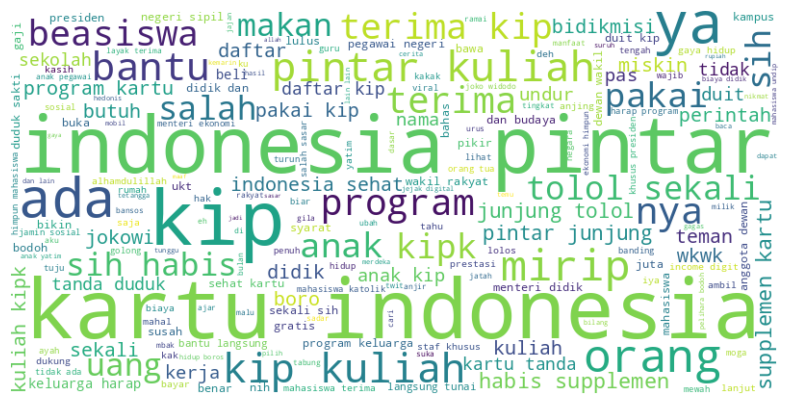

In [ ]:
from wordcloud import WordCloud
# Memfilter data berdasarkan predicted_sentiment 'anger' dan sentimen 'negatif'
filtered_df = pret[(pret["predicted_sentiment"] == "anger") & (pret["sentimen"] == "negatif")& (pret['jenis'] == 'kip')]

# Menggabungkan semua teks dari kolom data_clean
combined_text = " ".join(filtered_df["data_clean"])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

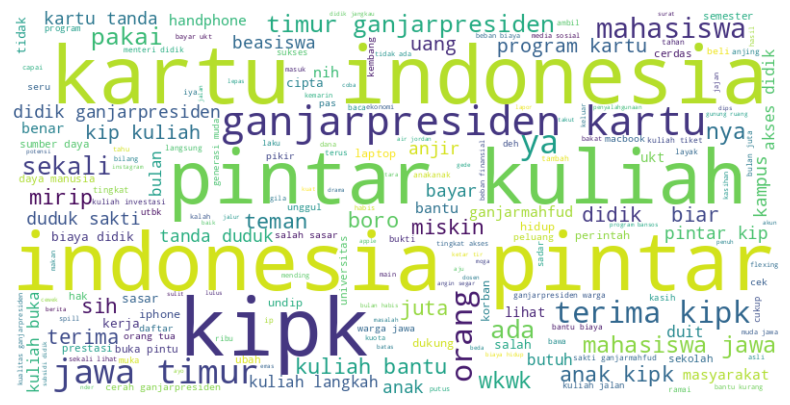

In [ ]:
from wordcloud import WordCloud
# Memfilter data berdasarkan predicted_sentiment 'anger' dan sentimen 'negatif'
filtered_df = pret[(pret["predicted_sentiment"] == "anger") & (pret["sentimen"] == "negatif")& (pret['jenis'] == 'kipk')]

# Menggabungkan semua teks dari kolom data_clean
combined_text = " ".join(filtered_df["data_clean"])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
pret.to_csv('data_berlabel_modeelemosi.csv')

In [ ]:
print(pret[['data_clean', 'predicted_sentiment']])
for index, row in pret.iterrows():
    print(f"Teks: {row['data_clean']}\emosi yang Diprediksi: {row['predicted_sentiment']}\n")


Output streaming akan dipotong hingga 5000 baris terakhir.
Teks: gaakan kasihan orang kasihan benerbener butuh kip nder kasihan orang mirip beli dior merek aoakoakwk\emosi yang Diprediksi: sadness

Teks: ija ada sih fisik orang gila trnytanada cewek brutal ya hina fisik cewek cakap mirip kip jual koran manusia silver cocok sih\emosi yang Diprediksi: sadness

Teks: bocah kelas beli starbuck bahasa malu daftar kip wkwk\emosi yang Diprediksi: fear

Teks: alhamdulillah ojek online anak kuliah poltek negeri kip moga kip butuh\emosi yang Diprediksi: happy

Teks: wkwk nih ciri sebentar jatuh miskin sih pakai kip orkay gammpu bayar kuliah kalah orang miskin gaya elite bacot elite bayar kuliah sulit malu\emosi yang Diprediksi: fear

Teks: anak kip cari jumat berkah sih seninkamis puasa kaji biar takjil\emosi yang Diprediksi: fear

Teks: kemarin kip selesai\emosi yang Diprediksi: fear

Teks: by akun terima kip gaya hidup boros dan lain lain cerita ya\emosi yang Diprediksi: happy

Teks: ha buka a

<ipython-input-35-ba7618018461>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=number, palette="vlag")


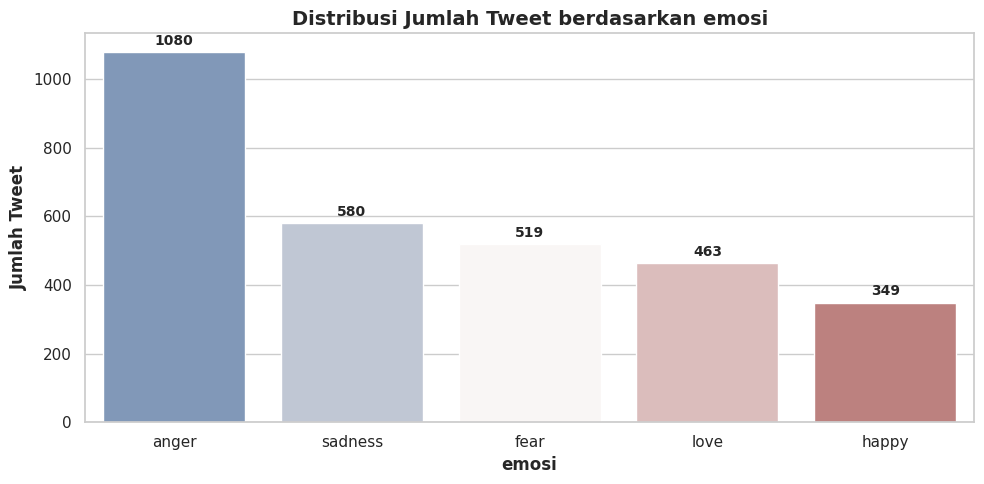

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

number = pret['predicted_sentiment'].value_counts()
labels = number.index

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=labels, y=number, palette="vlag")

# Customize the axes and labels
ax.set_xlabel("emosi", fontsize=12, weight='bold')
ax.set_ylabel("Jumlah Tweet", fontsize=12, weight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, weight='bold')

plt.title('Distribusi Jumlah Tweet berdasarkan emosi', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


In [ ]:
def map_sentiment(label):
    positive_labels = ['love', 'happy']
    negative_labels = ['anger', 'sadness', 'fear']

    if label in positive_labels:
        return 'positif'
    elif label in negative_labels:
        return 'negatif'
    else:
        return 'netral'  # atau kategori lain yang Anda inginkan

# Terapkan fungsi map_sentiment ke kolom label
pret['sentimen'] = pret['predicted_sentiment'].apply(map_sentiment)
pret.head()

,full_text,jenis,data_clean,predicted_sentiment,sentimen
0,@raenzaraenzaa @itsurboihyl Di sini ortunya ba...,kip,orang tua pelit keluar duit didik anak ada pur...,anger,negatif
1,@Red_Alien_ Setuju. Oke lah dia termasuk miski...,kip,tuju oke miskin pas terima kip cari hasil naik...,love,positif
2,orang salty tapi gamau disaltyin,kip,orang salty tidak mau disaltyin,anger,negatif
3,nih baca ya para netizen paling suci akun kip ...,kip,nih baca ya warganet suci akun kip officialnya...,anger,negatif
4,tau gaaa guyss kemrin habis ngobrol sama anak ...,kip,gaaa guyss kemrin habis obrol anak kip ngbroli...,anger,negatif


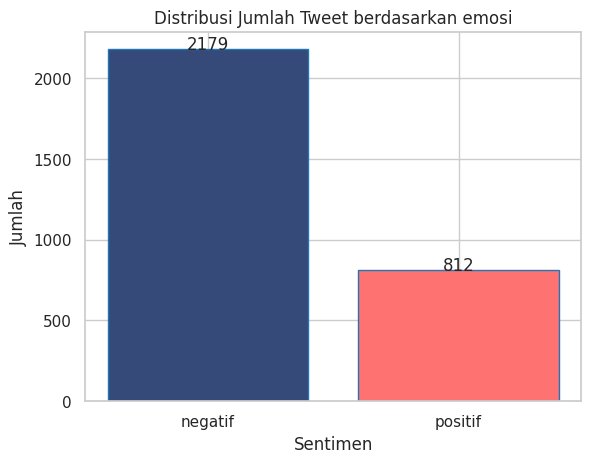

In [ ]:
import matplotlib.pyplot as plt

# Your existing code for sentiment counts
sentimen_counts = pret['sentimen'].value_counts()

labels = sentimen_counts.index
values = sentimen_counts.values

# Define two blue colors as a list
colors = ['#354a78', '#ff7272']  # Darker blue, Lighter blue

# Use the colors in the bar chart and set the edge color to a darker blue for contrast
plt.bar(labels, values, color=colors, edgecolor='#1f77b4')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Jumlah Tweet berdasarkan emosi')

# Add text labels above the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center')

# Display the plot
plt.show()